<a href="https://colab.research.google.com/github/drusho/EDA_US_Firework_Sales_and_Injuries/blob/main/notebooks/2021_07_03_firework_part_2_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Firework Sales and Injuries (Part 2) - Data Analysis
> Exploratory Data Analysis, Visualizations, Plotly, Seaborn

- toc: false
- badges: false
- comments: true
- categories: [Pandas, Plotly, Seaborn]
- image: "images/thumbnails/fireworks.png"

<br>

__Notebook Created by David Rusho__

[Github Repository for this Notebook](https://github.com/drusho/EDA_US_Firework_Sales_and_Injuries)

[Tableau Dashboard for Fireworks Inuries (2016-2021)](https://public.tableau.com/app/profile/drusho/viz/USFireworkInjuries2016-2021/Dashboard1)

#####[<img src="https://raw.githubusercontent.com/drusho/EDA_US_Firework_Sales_and_Injuries/main/assets/tableau_dashboard_preview.png" height="200"/>](https://public.tableau.com/app/profile/drusho/viz/USFireworkInjuries2016-2021/Dashboard1)


<br>

Other Social Media Links: 

  [Twitter](https://twitter.com/drusho)  |  [Github](https://github.com/drusho)  |  [Linkedin](https://linkedin.com/in/davidrusho)  |  [Tableau](https://public.tableau.com/app/profile/drusho)  

<br>

#hide

__To-Do List__

- (circle plot) for genders or something, need more variety of chart types 

- PDF like report (landscape style with graphs printed onto it

- Links at top of notebook to pdf_report and github, possibly tableau

## __Introduction__
---

Fireworks in the US are commonly used during the 4th of July and New Years' celebrations.  Besides being nice to look at fireworks also cause a lot of apparent problems. 

__Fires__

[_"More than one-quarter (28 percent) of fires started by fireworks in 2014–2018 were reported on the Fourth of July."_](https://www.nfpa.org/News-and-Research/Data-research-and-tools/US-Fire-Problem/Fireworks-fires-and-injures)

__Personal Injury__

["_The Consumer Product Safety Commission (CPSC) estimates that 9,100 consumer fireworks-related injuries were seen in US hospital emergency departments in 2018."_](https://www.nfpa.org/News-and-Research/Data-research-and-tools/US-Fire-Problem/Fireworks-fires-and-injures)


## Project Goals
---

To provide an overview of the types of incidents that involve fireworks.  This includes understanding which age groups are most affected and the frequency of injury types.  Insights from this analysis may help prevent future injuries or at least assist with increasing awareness of the dangers that fireworks can cause.

In addition to the above analysis, we'll take a look into sales data for all US states for the last five years (2016-2021).


## Summary of Results
---

#### Age group of 0-20 showed the highest rate of injury.

##### <img src="https://raw.githubusercontent.com/drusho/EDA_US_Firework_Sales_and_Injuries/main/reports/figures/Incident%20Counts%20by%20Age_Bar.png" width="700"/>

<br>
<br>

#### Injuries to the hands, face, and eyes were the most common, while injuries to lower extremities were less common.  

##### <img src="https://raw.githubusercontent.com/drusho/EDA_US_Firework_Sales_and_Injuries/main/reports/figures/Incident%20Counts%20by%20Body%20Part.png" height="300"/>

<br>
<br>

#### Missouri held the record for most spent on fireworks (over 250 million dollars over the past 5 years).  

##### <img src="https://raw.githubusercontent.com/drusho/EDA_US_Firework_Sales_and_Injuries/main/reports/figures/Total%20State%20Firework%20Sales%20(%24USD)%202016-2020%20(map).png" height="200"/>

<br>
<br>

#### There was no significate correlation between the number of injuries in a year compared to the number of sales.




## Import Libraries
___

In [ ]:
#collapse
# install libraries to save plotly images to disk
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-

!pip install texthero

In [ ]:
#collapse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import texthero as hero
from texthero import preprocessing
from texthero import stopwords
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Import Firework Injury Datasets
---

In [ ]:
#collapse-output
# Import clean injury dataframe
injury = 'https://github.com/drusho/fireworks_data_exploration/raw/main/data/data_clean/df_injury_clean.csv'
df_injury = pd.read_csv(injury,usecols=[1,2,3,4,5,6,7,8,9,10])
df_injury.head(3)

,Treatment_Date,Age,Sex,Alcohol,Drug,Narrative,Incident Locale,Body_Part,Diagnosis,Disposition
0,1/1/16,39,Male,NaN,NaN,39YOM WAS LIGHTING BOTTLE ROCKETS AND ONE FLEW...,Home,Eyeball,"Contusions, Abrasions",Treated/Untreated and Released
1,1/1/16,13,Male,NaN,NaN,13YOM SOMEONE POINTED FIREWORKS AT HIM FROM 10...,Home,Eyeball,"Contusions, Abrasions",Treated/Untreated and Released
2,7/5/16,31,Female,NaN,NaN,A 31YOF WAS STRUCK TO EYE WITH PIECE OF FIRECR...,Home,Eyeball,"Contusions, Abrasions",Treated/Untreated and Released


In [ ]:
#hide
#Change dtype for 'Treatment_Date' to datetime dtype
df_injury.Treatment_Date = pd.to_datetime(df_injury.Treatment_Date)
df_injury.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Treatment_Date   1532 non-null   datetime64[ns]
 1   Age              1532 non-null   int64         
 2   Sex              1532 non-null   object        
 3   Alcohol          701 non-null    float64       
 4   Drug             701 non-null    float64       
 5   Narrative        1532 non-null   object        
 6   Incident Locale  1532 non-null   object        
 7   Body_Part        1532 non-null   object        
 8   Diagnosis        1532 non-null   object        
 9   Disposition      1532 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 119.8+ KB


##Time Series Analysis of Injuries (Scatter Plot)

July 4th firework celebrations are the clear winner in number of firework related injuries.

In [ ]:
#collapse

#Time Series Analysis of Injuries (Scatter Plot)
#groupby treatment
injury_dates = df_injury.groupby('Treatment_Date').count().reset_index()
injury_dates = injury_dates.rename(columns={'Age':'Count'})

fig = px.scatter(injury_dates, x="Treatment_Date", y="Count")

fig.update_layout({"plot_bgcolor":"rgba(255,255,255, 0.9)"},
                  title={'text': "Firework Injury Counts by Date",
                  'y':.98,
                  'x':.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  xaxis=dict(title='Date of Injury'),
                  yaxis=dict(title='Injury Counts'))

fig.update_traces(marker_color='#1f77b4')

fig.show()

### Narrative Column Word Frequency (Bar Plot)

The Narrative column contains a detailed description of each injury reported.

Notice how the body parts 'hand', 'eye', and 'face' make the list.

In [ ]:
#collapse

#create a custom cleaning pipeline
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   #, preprocessing.remove_stopwords
                   , preprocessing.remove_whitespace]
                  #  , preprocessing.stem]

#pass the custom_pipeline to the pipeline argument
df_injury['clean_nar'] = hero.clean(df_injury['Narrative'], pipeline = custom_pipeline)

#add a list of stopwords to the stopwords
default_stopwords = stopwords.DEFAULT 

#Call remove_stopwords and pass the custom_stopwords list
custom_stopwords = default_stopwords.union(set(["'","I","r","dx","i","l","yom","yow","pt","type","p","w"]))

df_injury['clean_nar'] = hero.remove_stopwords(df_injury['clean_nar'], custom_stopwords)

tw  = hero.visualization.top_words(df_injury['clean_nar']).head(20).reset_index()

fig = px.bar(tw, 
             x='index', 
             y='clean_nar',
             orientation='v')

fig.update_layout({"plot_bgcolor":"rgba(255,255,255, 0.9)"},
                  title={'text': "Word Frequency for Injury Reports (2016-2021)",
                  'y':.98,
                  'x':.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  xaxis=dict(title=''),
                  yaxis=dict(title='Word Counts'))

fig.update_traces(marker_color='#1f77b4')

fig.show()

### Wordcloud of Injury Report (2016-2021)

Words are taken from the Narrative column and are narrowed down to the top 200 words.  

Looking at this wordcloud I get the idea that the initial lighting of fireworks is when a lot of injuries occur.

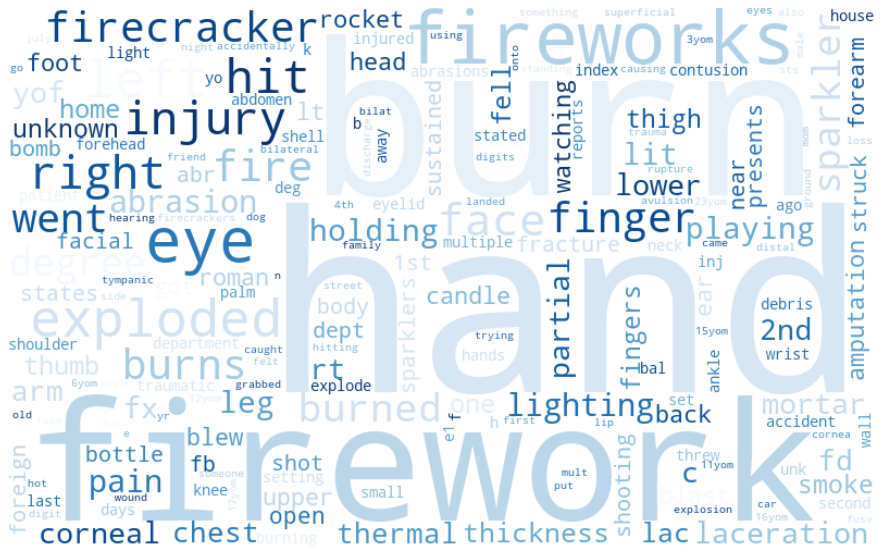

In [ ]:
#collapse
#Wordcloud from Narrative column using hero

hero.wordcloud(df_injury['clean_nar'], max_words=200,contour_color='', 
               background_color='white',colormap='Blues',
               height = 500,width=800)

#hide
### Converting Alchol/Drug booleans (0,1) values to yes/no

In [ ]:
#hide
#Converting Alcohol and Drug columns to 'yes/no' values
#Fill nan values to 0.0 
#Convert all values to float type
#Convert 0.0 to No and 1.0 to Yes

#Change nan values to to 0.0 string
df_injury.Alcohol = df_injury['Alcohol'].fillna(0.0)

# Convert dytpe to float
df_injury.Alcohol = df_injury.Alcohol.astype('float')

# Convert Alcohol to Yes/No
df_injury.Alcohol = df_injury['Alcohol'].replace(1.0,"Yes").replace(0.0,"No")
df_injury.head(2)

#Change nan values to to 0.0 string
df_injury.Drug = df_injury['Drug'].fillna(0.0)

# Convert dytpe to float
df_injury.Drug = df_injury.Drug.astype('float')

# Convert Drug to Yes/No
df_injury.Drug = df_injury['Drug'].replace(1.0,"Yes").replace(0.0,"No")
df_injury.head(2)

,Treatment_Date,Age,Sex,Alcohol,Drug,Narrative,Incident Locale,Body_Part,Diagnosis,Disposition,clean_nar
0,2016-01-01,39,Male,No,No,39YOM WAS LIGHTING BOTTLE ROCKETS AND ONE FLEW...,Home,Eyeball,"Contusions, Abrasions",Treated/Untreated and Released,39yom lighting bottle rockets one flew eye ...
1,2016-01-01,13,Male,No,No,13YOM SOMEONE POINTED FIREWORKS AT HIM FROM 10...,Home,Eyeball,"Contusions, Abrasions",Treated/Untreated and Released,13yom someone pointed fireworks 10ft away ...


### Counting Drug and Alchol Use

The number of people injuried with positive results for drug or alcohol use was very insignificant compared to overall count of injuries.  

In [ ]:
#hide
# Count Drug and Alcohol for df_injury
df_da = df_injury.groupby(['Drug','Alcohol'])['Age'].count().reset_index(name='count')
df_da

,Drug,Alcohol,count
0,No,No,1487
1,No,Yes,40
2,Yes,No,1
3,Yes,Yes,4


### Drug and Alcohol Usuage (Bar Plot)

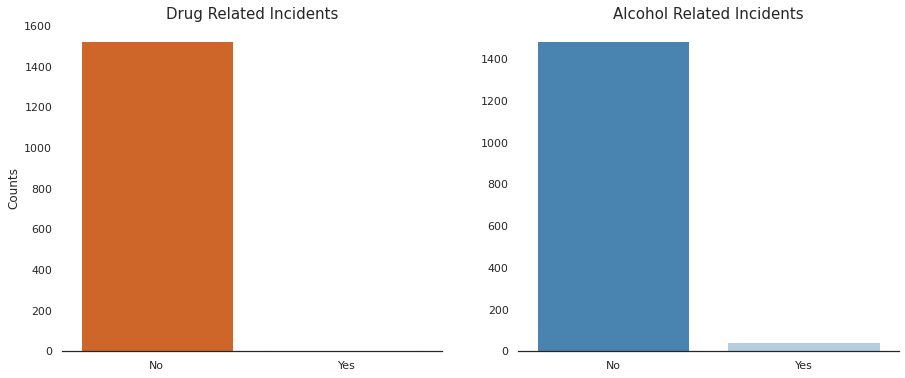

In [ ]:
#collapse
#define figure size
sns.set(rc={"figure.figsize":(15, 6)})

#set background to white
sns.set_style("white")

fig, ax = plt.subplots(1,2)

sns.countplot(df_injury['Drug'], 
              ax=ax[0],
              palette="Oranges_r")

ax[0].set_title('Drug Related Incidents', 
             fontdict = {'fontsize': 15})
ax[0].set(ylabel='Counts',
       xlabel='')

sns.countplot(df_injury['Alcohol'], 
              ax=ax[1],
              palette="Blues_r")

ax[1].set_title('Alcohol Related Incidents', 
             fontdict = {'fontsize': 15})
ax[1].set(ylabel='',
       xlabel='')

# remove spines
sns.despine(left=True)

#save to png
# fig.savefig("Drug/Alcohol Counts.png")

plt.show()
fig.savefig('Drug_and_Alcohol_Counts.png')

plt.show()

In [ ]:
#hide
# Sort DF by treatment date
df_injury.sort_values(by = 'Treatment_Date',
                      inplace = True)

### Incident Counts by Year (Bar Plot)

The most injuries occured in 2020, which also saw its largest increase in firework sales.  This correlation doesn't seem to match prior years.

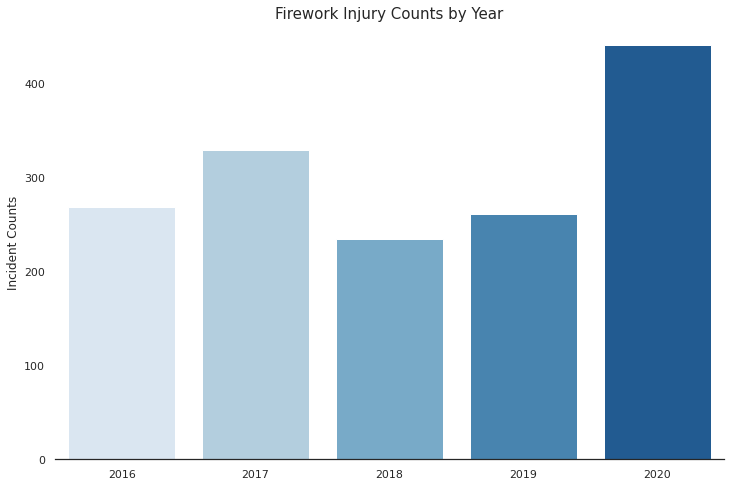

In [ ]:
#collapse
# Incident Counts by Year BarGraph

#define figure size
sns.set(rc = {"figure.figsize":(12,8)})

#set background to white
sns.set_style("white")

treamentDates = df_injury['Treatment_Date'].dt.year.value_counts().sort_index().reset_index()

ax = sns.barplot(y="Treatment_Date", 
                 x="index", 
                 data=treamentDates, 
                 palette="Blues")

#set x,y labels
ax.set(xlabel='',
       ylabel='Incident Counts')

#set titles
ax.set_title('Firework Injury Counts by Year', 
             fontdict = {'fontsize': 15})

#remove spiens
sns.despine(left=True)

#save to png
ax.figure.savefig("Firework Injury Counts by Year.png")

plt.show()

### Incident Counts by Gender (Bar Plot)

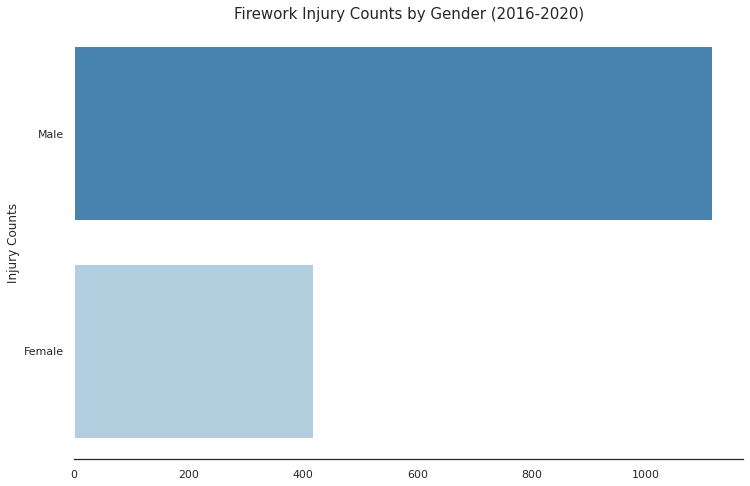

In [ ]:
#collapse
# Incident Counts by Sex

incidentSex = df_injury['Sex'].value_counts().reset_index(name='incidents')

#define figure size
sns.set(rc={"figure.figsize":(12, 8)})

#set background to white
sns.set_style("white")

ax = sns.barplot(x="incidents", 
                 y="index", 
                 data=incidentSex, 
                 palette="Blues_r")

#set x,y labels
ax.set(xlabel='',
       ylabel='Injury Counts')

#set titles
ax.set_title('Firework Injury Counts by Gender (2016-2020)', 
             fontdict = {'fontsize':15})

#remove spines
sns.despine(left=True)

#save to png
ax.figure.savefig("Firework Injury Counts by Gender.png")

plt.show()

### Incident Counts by Body Part (Bar Plot)

The body parts listed also match the body parts mentioned in word frequency count of narratives.

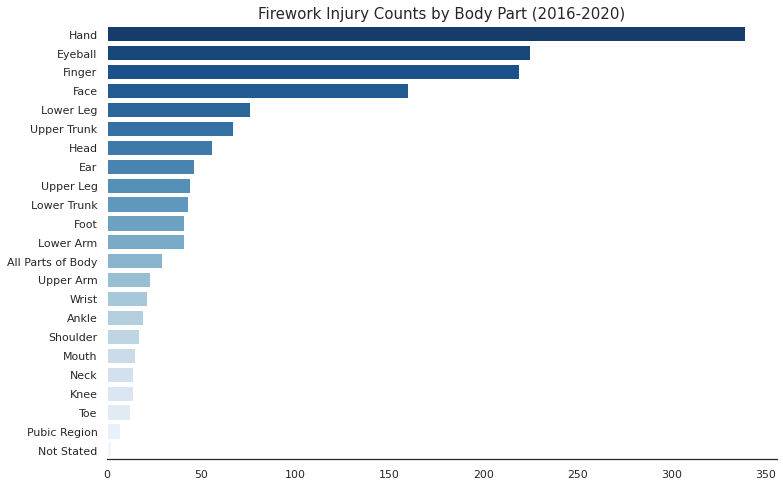

In [ ]:
#collapse
# Incident Counts by Body Part

#define figure size
sns.set(rc={"figure.figsize":(12,8)})

#set background color
sns.set_style("white")

incidentBp = df_injury['Body_Part'].value_counts().reset_index(name='incidents').head(23)

ax = sns.barplot(x="incidents", 
                 y="index", 
                 data=incidentBp, 
                 palette="Blues_r")

#set x,y labels
ax.set(xlabel='',
       ylabel='')

#set title
ax.set_title('Firework Injury Counts by Body Part (2016-2020)', 
             fontdict = {'fontsize':15})

#remove spines
sns.despine(left=True)

#save to png
ax.figure.savefig("Incident Counts by Body Part.png")

plt.show()

#hide
### Fixing Age Column  

<details>

<summary>Details</summary>

The Age column list not only numeric ages but also includes category codes for individuals under the age of 2 year old.  Individuals that are under 2 years old are given a code starting with 200 combined with their age in months.  If the patient is older than 115 years old, code the age as 115 and indicate the actual age in the Comment. If the ED record indicates the patient was born on January 1, 1900, please verify the patient’s age with hospital staff – some hospitals use this date when the patient’s age is unknown.

</details>

<details>

<summary>Note</summary>

CPSC prefers that coders use the Date of Birth variable in lieu of the age variable. Mistakes in coded ages are common when patients have birthdays after the date of treatment and before the NEISS coder codes the case. Hospital medical record systems automatically update the age of the patient daily.

</details>
 

In [ ]:
#hide
# Age Codes 
age_code = {0:'No Recorded Age',
                2:'2 Years Old',
                45:'45 Years Old',
                100:'100 Years Old',
                102:'102 Years Old',
                201:'Three Weeks Old',
                201:'Four Weeks Old',
                201:'Seven Weeks Old',
                202:'Ten Weeks Old',
                209:'Nine Months Old',
                212:'Twelve months (one year)',
                218:'Eighteen months'}

# my_dict = {'Computer':1500,'Monitor':300,'Printer':150,'Desk':250}

age_codes = pd.DataFrame(list(age_code.items()),columns = ['Age_Code','Description']) 

#Display Age Codes and Description
age_codes

,Age_Code,Description
0,0,No Recorded Age
1,2,2 Years Old
2,45,45 Years Old
3,100,100 Years Old
4,102,102 Years Old
5,201,Seven Weeks Old
6,202,Ten Weeks Old
7,209,Nine Months Old
8,212,Twelve months (one year)
9,218,Eighteen months


In [ ]:
#hide
# create fix_age col
# 'fix_age' col represents ages only in numeric years, 
def fix_age(age):
  if 201 <= age <=209:
    age = 0
    return age
  elif age >=201:
    age = 1
    return age
  else:
    return age

df_injury['Age_Fix'] = df_injury['Age'].apply(fix_age)
df_injury.query('Age>=200').head()

df_injury.to_csv('df_injury_clean2.csv')

### Age Groups (Histogram)

<details>

<summary>Details</summary>

The histogram below shows that the majority of firework related injuries that were reported occured with indivuals under the age of 40.  The largest grouping belonged to individuals under the age of 20, which is also below the legal drinking age in the US.  

</details>

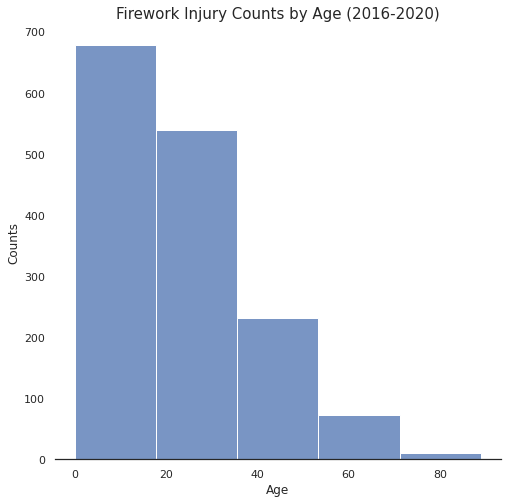

In [ ]:
#collapse
# Histogram of Ages

#set figsize
sns.set(rc={"figure.figsize":(8, 8)})

#set background color
sns.set_style("white")

ax = sns.histplot(data=df_injury, 
                  x='Age_Fix', 
                  bins=5)

#set x,y labels
ax.set(xlabel='Age',
       ylabel='Counts')

#set title
ax.set_title('Firework Injury Counts by Age (2016-2020)', 
             fontdict = {'fontsize':15})

#remove spines
sns.despine(left=True)

#save to png
ax.figure.savefig("Incident Counts by Age_Hist.png")

plt.show()

### Incident Counts by Age (Bar Plot)

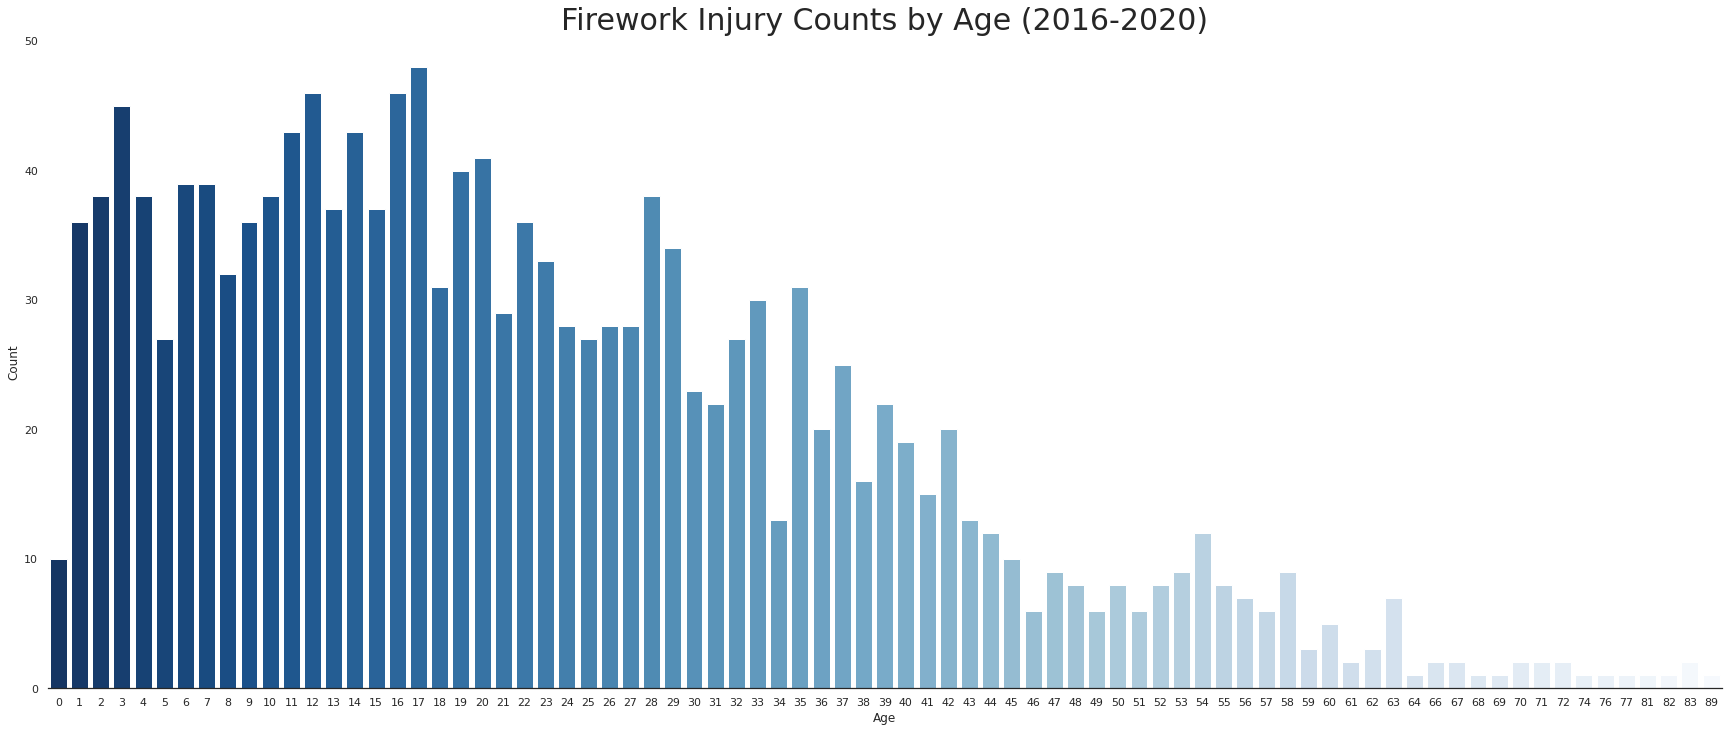

In [ ]:
#collapse
# Incident Counts by Age (Age_Fix)

#define figure size
sns.set(rc={"figure.figsize":(30, 12)})

#set background color
sns.set_style("white")

incidentAge = df_injury['Age_Fix'].value_counts().reset_index(name='incidents')

ax = sns.barplot(y="incidents", 
                 x="index", 
                 data=incidentAge, 
                 palette="Blues_r")

#set x,y labels
ax.set(xlabel='Age',
       ylabel='Count')

#set title
ax.set_title('Firework Injury Counts by Age (2016-2020)', 
             fontdict = {'fontsize':30})

#remove spines
sns.despine(left=True)

#save to png
ax.figure.savefig("Incident Counts by Age_Bar.png")

plt.show()

### Firework Incident Counts by Age, Year, and Gender (Swarm Plot)

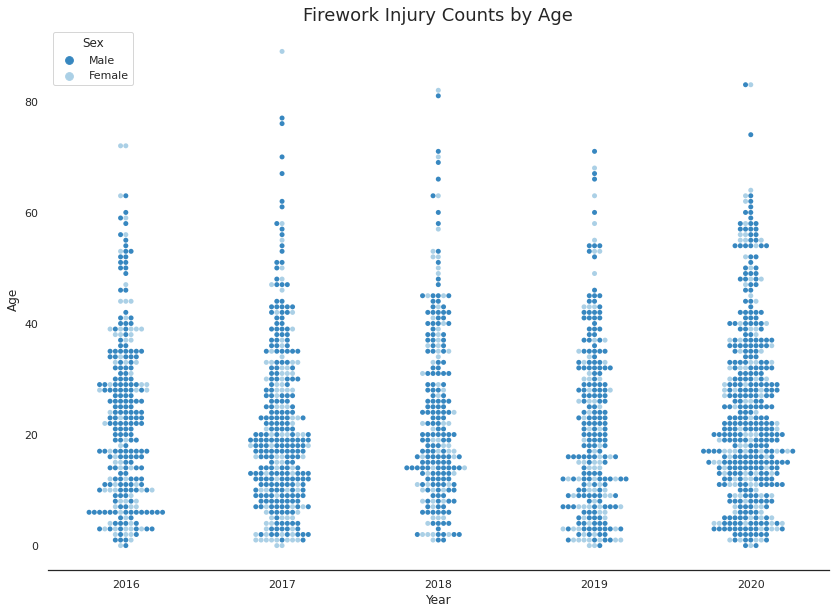

In [ ]:
#collapse
# Swarm graph by age, year, and gender

#define figure size
sns.set(rc={"figure.figsize":(14,10)})

#set background color
sns.set_style("white")

ax = sns.swarmplot(data = df_injury, 
                   x = df_injury['Treatment_Date'].dt.year, 
                   y = "Age_Fix",
                   hue = "Sex",
                   palette = "Blues_r")

#set x,y labels
ax.set(xlabel = 'Year',
       ylabel = 'Age')

#set title
ax.set_title('Firework Injury Counts by Age', 
             fontdict = {'fontsize':18})

#remove spines
sns.despine(left=True)

#save to png
ax.figure.savefig("Incident Counts by Age_Swarm.png")

plt.show()

#hide
### Incident Counts by Disposition (Bar Plot)

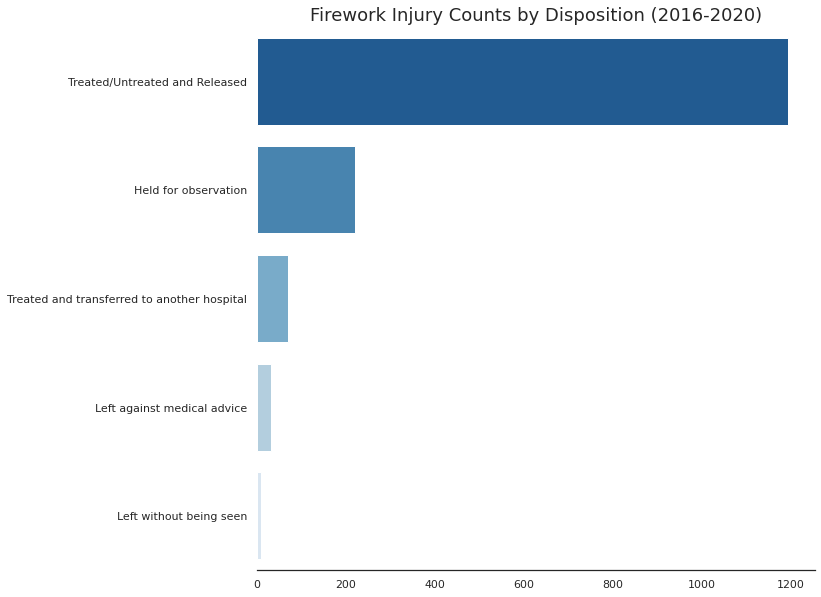

In [ ]:
#hide
# Incident Counts by Disposition

incidentDis = df_injury['Disposition'].value_counts().reset_index(name='incidents').head()

#define figure size
sns.set(rc={"figure.figsize":(10,10)})

#set background color
sns.set_style("white")

ax = sns.barplot(x = "incidents", 
                 y = "index", 
                 data = incidentDis, 
                 palette = "Blues_r")

#set x,y labels
ax.set(xlabel = '',
       ylabel = '')

ax.set_title('Firework Injury Counts by Disposition (2016-2020)', 
             fontdict = {'fontsize':18})

#set title
# ax.set_ylabel('', fontdict= {'fontsize':25})

#remove spine
sns.despine(left=True)

#save to png
# ax.figure.savefig("Incident Counts by Disposition.png")

plt.show()

### Incident Counts by Diagnosis (Bar Plot)

Most injuries were from burns.  Combining this information with the analysis above on injuries to body parts (eyes, face, and hands) provides a clear picture of how severe these burn injuries are to people involved.

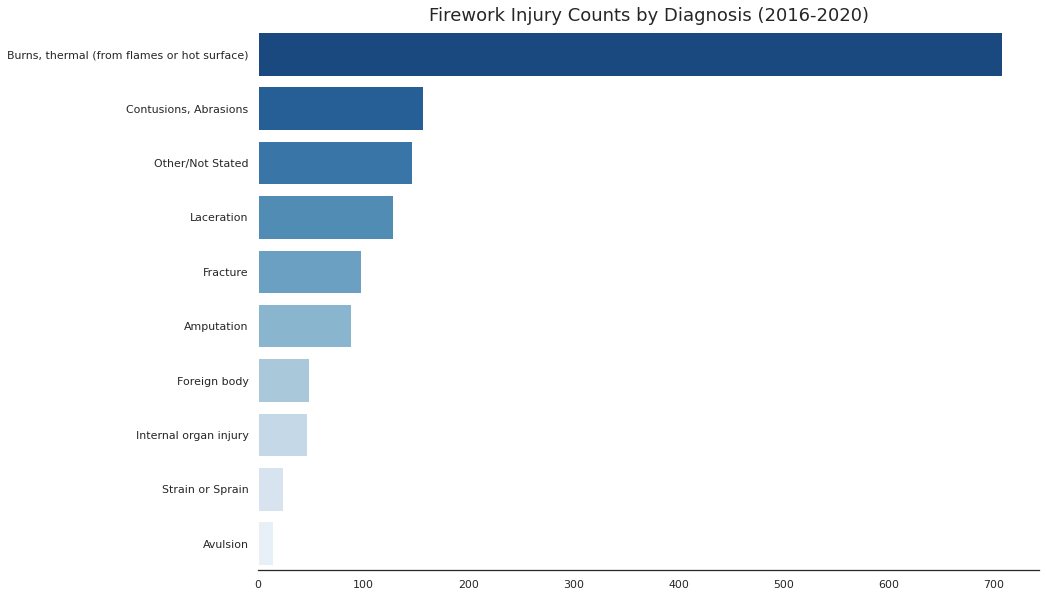

In [ ]:
#collapse
# Incident Counts by Diagnosis

incidentDia = df_injury['Diagnosis'].value_counts().reset_index(name='incidents').head(10)

#define figure size
sns.set(rc={"figure.figsize":(14,10)})

#set background color
sns.set_style("white")

ax = sns.barplot(x = "incidents", 
                 y = "index", 
                 data = incidentDia, 
                 palette = "Blues_r")

#set x,y labels
ax.set(xlabel = '',
       ylabel = '')

#set title
ax.set_title('Firework Injury Counts by Diagnosis (2016-2020)', 
             fontdict = {'fontsize':18})

#remove spine
sns.despine(left=True)

# #set y axis labels (shortened longer labels to fit for print out)
# ax.set_yticklabels(['Burns', 'Contusions', 'Abrasions','Other/Not Stated',
#                     'Laceration','Fracture','Amputation','Foreign body',
#                     'Internal organ','Strain or Sprain','Avulsion',
#                     'Anoxia','Puncture','Poisoning','Dermatitis', 'Conjunctivitis',
#                     'Concussions','Hematoma'])

#save to png
ax.figure.savefig("Incident Counts by Diagnosis.png")

plt.show()

## __Import Firework Sales Data (State)__
---

In [ ]:
#collapse
sales_state = 'https://github.com/drusho/fireworks_data_exploration/raw/main/data/data_raw/State%20Imports%20by%20HS%20Commodities.csv'
df_sales_st = pd.read_csv(sales_state,skiprows=4,usecols=[0,1,2,3])
df_sales_st.head()

,State,Commodity,Time,Total Value ($US)
0,Alabama,360410 Fireworks,2016,"29,602,090"
1,Alabama,360410 Fireworks,2017,"19,396,430"
2,Alabama,360410 Fireworks,2018,"26,399,895"
3,Alabama,360410 Fireworks,2019,"28,353,392"
4,Alabama,360410 Fireworks,2020,"23,141,950"


### Web Scraping for State Abbreviations

The dataframe was missing state abbreviations that are needed to plot data onto a map using Plotly.  Used pandas function 'read_hml' to read tables from a website that contained state and state abbreviation data.


In [ ]:
#collapse
#WebScrap State Abbreviations

#scrap state names and abbrev
states_abrev = pd.read_html('https://abbreviations.yourdictionary.com/articles/state-abbrev.html')[0].iloc[1:,:2]

#scrap US territory names and abbrev
territories = pd.read_html('https://abbreviations.yourdictionary.com/articles/state-abbrev.html')[1].iloc[[2,5],:2]

#merge dfs
st_at = states_abrev.merge(territories,how='outer').sort_values(by=0).reset_index(drop=True)

#rename cols
st_at.rename(columns={0:'State',1:'Abbrevation'},inplace=True)

st_at.head()

,State,Abbrevation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


### Merging State Abbreviations with Master Dataframe

In [ ]:
#collapse
#merge abbrevation with state sales data
df_sales_st2 = df_sales_st.merge(st_at,how='inner')

df_sales_st2.head()

,State,Commodity,Time,Total Value ($US),Abbrevation
0,Alabama,360410 Fireworks,2016,"29,602,090",AL
1,Alabama,360410 Fireworks,2017,"19,396,430",AL
2,Alabama,360410 Fireworks,2018,"26,399,895",AL
3,Alabama,360410 Fireworks,2019,"28,353,392",AL
4,Alabama,360410 Fireworks,2020,"23,141,950",AL


#hide
### Changing Data Types for Time and Sales

In [ ]:
#hide
#Convert Sales to int dtype
df_sales_st2['Total Value ($US)'] = df_sales_st2['Total Value ($US)'].str.replace(',','').astype('int')
df_sales_st2.head(2)

#Convert Time to datetime dtype
df_sales_st2['Time'] = df_sales_st2['Time'].str.replace('2021 through April','2021')
df_sales_st2['Time'] = pd.to_datetime(df_sales_st2['Time'])

#export csv of clean data
df_sales_st2.to_csv('df_state_sales_clean.csv')

In [ ]:
#hide
df_sales_st2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 284
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   State              285 non-null    object        
 1   Commodity          285 non-null    object        
 2   Time               285 non-null    datetime64[ns]
 3   Total Value ($US)  285 non-null    int64         
 4   Abbrevation        285 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 13.4+ KB


### Top Sales per State (Bar Plot)

In [ ]:
#collapse
# Visualization State Sales (Bar Plot)
st_sales = df_sales_st2.copy()

st_sales = st_sales.groupby('State')['Total Value ($US)'].sum().reset_index(name='Sales').sort_values(by='Sales',ascending=False).reset_index(drop=True).head(20)

st_sales.sort_values(by='Sales',ascending=True,inplace=True)

fig = px.bar(st_sales, 
             y='State', 
             x='Sales',
             orientation='h',
             color_continuous_scale='Blues',
             color="Sales")

fig.update_layout({"plot_bgcolor":"rgba(255,255,255, 0.9)"},
                  title={'text': "Firework Total Sales ($USD) 2016-2020",
                  'y':.98,
                  'x':.5,
                  'xanchor': 'center',
                  'yanchor': 'top'})

fig.show()

# # save fig to image
# fig.write_image("Total Firework Sales ($USD) 2016-2020.png", width=1980, height=1080)

# fig.write_html("Total Firework Sales ($USD) 2016-2020.html") 

### State Sales (Scatter Plot)

<details>

<summary>Note</summary>

Plotly currently does not have the ability to position colorscales to horizontal.

</details>

In [ ]:
#collapse
# Visualization State Sales (Scatter Plot)

df_sales_st2.sort_values(by='State',ascending=False,inplace=True)

fig = px.scatter(df_sales_st2, 
                 y="State", 
                 x="Time", 
                 color="Total Value ($US)",
                 size='Total Value ($US)', 
                 width=800, height=1100,
                 color_continuous_scale='Blues')

#change background and legend background to white
fig.update_layout({"plot_bgcolor":"rgba(255,255,255, 0.9)"},
                  #  "paper_bgcolor": "rgba(255,255,255, 0.9)"},
                  title={'text': "Firework Sales ($USD)",
                         'y':.98,
                         'x':.5,'xanchor':'center',
                         'yanchor': 'top'},
                  xaxis=dict(title=''),
                  yaxis=dict(title=''))

fig.show()

# save fig to image
fig.write_image("Firework Sales ($USD) (scatter_plot).png", width=800, height=1000)

fig.write_html("Firework Sales ($USD) (scatter_plot).html")

### State Sales (Heatmap Plot of US)

In [ ]:
#hide
df_sales_st2.head(2)

,State,Commodity,Time,Total Value ($US),Abbrevation
284,Wyoming,360410 Fireworks,2021-01-01,606265,WY
283,Wyoming,360410 Fireworks,2020-01-01,2208173,WY


In [ ]:
#collapse
fig = px.choropleth(df_sales_st2,  # Input Pandas DataFrame
                    locations="Abbrevation",  # DataFrame column with locations
                    color="Total Value ($US)",  # DataFrame column with color values
                    hover_name="Abbrevation", # DataFrame column hover info
                    locationmode = 'USA-states', # Set to plot as US States
                    color_continuous_scale='Blues')

fig.update_layout(
    title={
        'text': "Firework Total Sales ($USD) 2016-2020",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    geo_scope='usa')  # Plot only the USA instead of globe

fig.show()

# save fig to image
fig.write_image("Total State Firework Sales ($USD) 2016-2020 (map).png", 
                width=1980, 
                height=1080)
fig.write_html("Total State Firework Sales ($USD) 2016-2020 (map).html")

## Comparing Sales and Injury Reports 

### Total Sales Groupby Year

In [ ]:
#collapse
# Total Sales groupby Year
sales_year = df_sales_st2.groupby(df_sales_st2['Time'].dt.year).sum().reset_index(drop=False)
sales_year.rename(columns={'Time':'Year','Total Value ($US)':'Sales'},inplace=True)
sales_year

,Year,Sales
0,2016,307825710
1,2017,279962808
2,2018,331072715
3,2019,320021354
4,2020,300987616
5,2021,157186415


### Total Injuries Groupby Year

In [ ]:
#collapse
# df_injury.groupby(['Treatment_Date']
df_injury_count = df_injury.groupby(df_injury['Treatment_Date'].dt.year)['Age'].count().reset_index(name='Count')
df_injury_count.rename(columns={'Treatment_Date':'Year'},inplace=True)
df_injury_count

,Year,Count
0,2016,268
1,2017,329
2,2018,234
3,2019,261
4,2020,440


### Merging Sales and Injury DataFrame on Year

In [ ]:
#collapse
# Merge sales and injury dfs on year
df_merged = sales_year.merge(df_injury_count,how='left')
df_merged

,Year,Sales,Count
0,2016,307825710,268.0
1,2017,279962808,329.0
2,2018,331072715,234.0
3,2019,320021354,261.0
4,2020,300987616,440.0
5,2021,157186415,NaN


###Determining Correlation of New DataFrame

In [ ]:
#collapse
# Correlation
df_merged.corr()

,Year,Sales,Count
Year,1.000000,-0.585906,0.529818
Sales,-0.585906,1.000000,-0.590087
Count,0.529818,-0.590087,1.000000


## __Conclusion__
---


__Injuries__

Age groups of 0-20 showed the highest rate of injury.  Injury rates by age decrease with age tend to slowly decrease after age 20.  The 60+ age groups showed the lowest rate of injury.  

Injuries to the hands, face, and eyes were the most common, while injuries to lower extremities were less common.  This is reflected numerous times in the data, such as with word frequency of injury narratives, where an explanation is given for how a person was injured.  

Time series analysis showed that the month of July has the highest frequency of firework related injuries.

__Sales__

Missouri held the record for most spent on fireworks (over 250 million dollars over the past 5 years).  For comparison, Alaska spent around 560,000 dollars in the last five years.  Sales for fireworks saw a considerable increase in sales during 2020, most likely due to COVID-19.

__Correlation Between Sales and Injury Counts__

There was no significate correlation between the number of injuries in a year compared to the number of sales.

__Ending Remarks__

Never hold fireworks while lighting them, and hand, eye, and face protection should be worn at all times when fireworks are nearby fireworks.  This is especially true if you are a male below the age of 21.

## Tools Used
---

1. Matplotlib
2. Pandas
3. Plotly
4. Seaborn

## __Resources__


1. [Consumer Product Safety Commision](https://www.cpsc.gov/cgibin/NEISSQuery/UserCriteria.aspx?UserAff=5x08cgz9T6YPDAZJzvlZjA%3d%3d&UserAffOther=9OYR9kUytIsLilKZieD5xg%3d%3d)

2. [USA Trade Census](https://usatrade.census.gov/)

3. National Fire Protection Association: [Fireworks fires and injuries](https://www.nfpa.org/News-and-Research/Data-research-and-tools/US-Fire-Problem/Fireworks-fires-and-injures)

<details>

<summary>Source Details</summary>

Source 1 consisted multiple excel incident reports involving fireworks over the past 5 years taken from the U.S. Consumer Product Safety Commission (CPSC).

The NEISS injury data are gathered from the emergency departments (ED) of 96 hospitals selected as a probability sample of all U.S. hospitals with 24-hour EDs and at least 6 inpatient beds. Each participating NEISS hospital is hand-selected by CPSC because it provides an important representation of all other hospitals of its size and unique characteristics in the U.S.

Source 2 conatins Sales and Trade data for each state regarding fireworks.  Reports data range from 2016 to April 2021.

</details>